In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [5]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [6]:
sample_data = [
    ('Pen', 10, 1.5),
    ('Notebook', 5, 3.0),
    ('Pencil', 20, 0.5),
    ('Eraser', 15, 0.75)
]

In [7]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [9]:
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [10]:
print(df)

    product  total_qty  revenue
0    Eraser         15    11.25
1  Notebook          5    15.00
2       Pen         10    15.00
3    Pencil         20    10.00


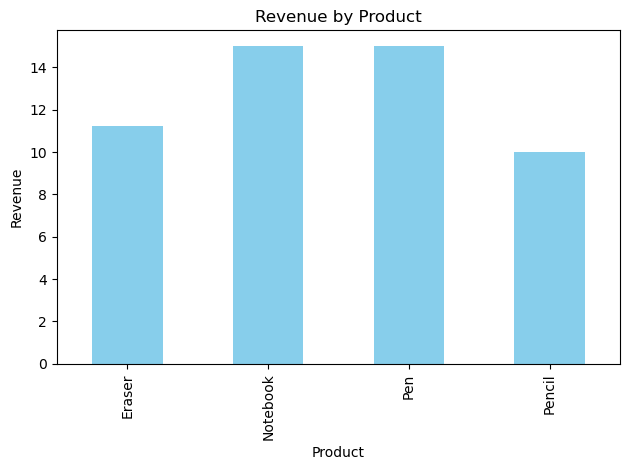

In [11]:
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  
plt.show()
